# Breast Cancer Prediction using Artificial Neural Networks

This analysis demonstrates the use of an Artificial Neural Network (ANN) to predict whether a breast cancer tumor is malignant or benign. The dataset used is the Wisconsin Breast Cancer dataset, which contains various features of tumors. We will go through the steps of data loading, preprocessing, model creation, training, and evaluation.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/breast_cancer_wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Cleaning & Preprocessing

In [ ]:
# Drop not needed columns
df.drop(columns=['id'],inplace=True)

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Convert 'diagnosis' value to binary
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

df['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## Define Features and Target

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalise the Data

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create the Neural Network

In [ ]:
input_dim = X_train_scaled.shape[1]

model = keras.Sequential([

    layers.Dense(16, activation='relu', input_shape=[input_dim]),
    layers.Dense(1, activation='sigmoid'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

## Train the Model

In [ ]:
created_model = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5052 - loss: 0.6853 - val_accuracy: 0.4835 - val_loss: 0.6770
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5715 - loss: 0.6697 - val_accuracy: 0.6154 - val_loss: 0.6589
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7302 - loss: 0.6441 - val_accuracy: 0.7253 - val_loss: 0.6413
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7442 - loss: 0.6332 - val_accuracy: 0.8462 - val_loss: 0.6236
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8240 - loss: 0.6181 - val_accuracy: 0.8681 - val_loss: 0.6057
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8244 - loss: 0.5985 - val_accuracy: 0.8791 - val_loss: 0.5882
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8456 - loss: 0.5843 - val_accuracy: 0.8681 - val_loss: 0.5722
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8830 - loss: 0.5609 - val_accuracy: 0.8681 

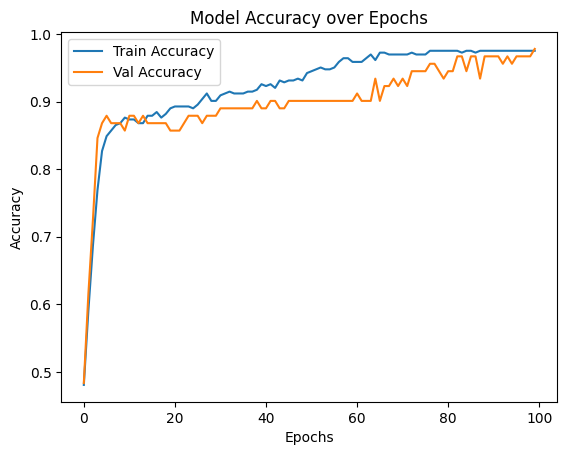

In [ ]:
# Plot Accuracy
plt.plot(created_model.history['accuracy'], label='Train Accuracy') # Access history correctly
plt.plot(created_model.history['val_accuracy'], label='Val Accuracy') # Access history correctly
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
# accuracy = model.evaluate(X_test_scaled, y_test)[1]
# print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracy = model.evaluate(X_test_scaled, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9815 - loss: 0.0939


In [ ]:
# Predict
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[70  1]
 [ 1 42]]


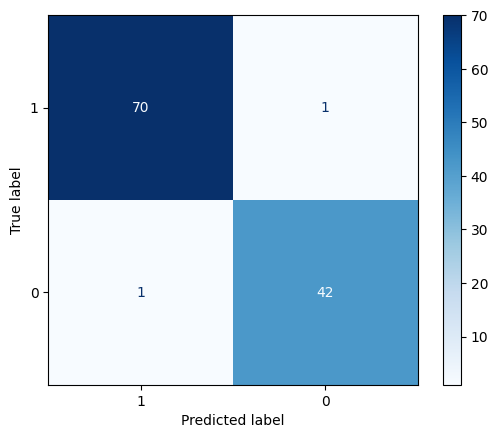

In [ ]:
# Confusion Matrix
display_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=y.unique())
display_cm.plot(cmap="Blues")

## Predicting New Data

In [ ]:
new_sample = [[14.0, 20.0, 90.0, 600.0, 0.1, 0.15, 0.2, 0.1, 0.2, 0.07,
               0.3, 1.0, 2.0, 25.0, 0.007, 0.02, 0.03, 0.01, 0.02, 0.005,
               16.0, 25.0, 100.0, 800.0, 0.12, 0.25, 0.3, 0.15, 0.3, 0.08]]

In [ ]:
# Preprocess the new samples
new_samples_scaled = scaler.transform(new_sample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Predict
prediction = model.predict(new_samples_scaled)
prediction_label = (prediction > 0.5).astype("int32")

# Interpret the result
if prediction_label[0][0] == 1:
    print("Prediction: Malignant (Cancerous)")
else:
    print("Prediction: Benign (Non-cancerous)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Malignant (Cancerous)


## Conclusion

This project successfully demonstrated the application of an Artificial Neural Network for breast cancer prediction. The model achieved a high accuracy on the test set, indicating its effectiveness in distinguishing between malignant and benign tumors. The confusion matrix further revealed that the model has a low number of false positives and false negatives, which is crucial for medical diagnostic applications. Future work could involve exploring different neural network architectures, hyperparameter tuning, and incorporating other data sources to potentially enhance the model's predictive power.